In [127]:
import pandas as pd

# Read the CSV file
file_path = 'C://Users//roryq//Downloads//all_jobs_with_data_buyer_labels.csv'
df = pd.read_csv(file_path)

# Show the first few rows

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5829 entries, 0 to 5828
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobID               5829 non-null   int64  
 1   JobTitle            5829 non-null   object 
 2   JobDescription      5827 non-null   object 
 3   KeyDuties           5829 non-null   object 
 4   Department          5829 non-null   object 
 5   Agency              5829 non-null   object 
 6   SearchKeywords      5829 non-null   object 
 7   CombinedText        5829 non-null   object 
 8   IsDataBuyer         5829 non-null   int64  
 9   DataBuyerScore      5829 non-null   float64
 10  PredictedDataBuyer  5829 non-null   int64  
 11  FuzzyMatchedPhrase  938 non-null    object 
 12  IsFuzzyMatch        5829 non-null   int64  
 13  IsLikelyDataBuyer   5829 non-null   int64  
 14  AgencySize          5829 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 683.2+

In [128]:
df.head()

,JobID,JobTitle,JobDescription,KeyDuties,Department,Agency,SearchKeywords,CombinedText,IsDataBuyer,DataBuyerScore,PredictedDataBuyer,FuzzyMatchedPhrase,IsFuzzyMatch,IsLikelyDataBuyer,AgencySize
0,827053600,DATA SCIENTIST,"Click on ""Learn more about this agency"" button below for IMPORTANT additional information. The primary purpose of this position is: serve as an advanced trainee, to receive on-the job training in Data Science, and to complete developmental assignments and training outlined in the formal training & development plan. This is a formal Air Force intern position, established under the PALACE Acquire (PAQ) program.","['1. Performs developmental assignments in support of projects assigned to higher level analysts. Performs minor phases of a larger assignment or work of moderate difficulty where procedures are established, and a number of specific guidelines exist. Applies the various steps of accepted data science procedures to search for information and perform well precedented work. Performs a series of specific and related tasks that have been selected to orient the employee in the practical application of basic occupational techniques, such as conducting analytical investigations using scientific methodology and problem solving for matters that are primarily of a factual nature. Assignments are combined with training to further develop analytical skills and techniques. Assistance is available from the supervisor or a higher-graded specialist. 2. Performs general operations and assignments for portions of a project or study consisting of a series of interrelated tasks or problems. The employee applies judgment in the independent application of methods and techniques previously learned. The employee locates and selects the most appropriate guidelines and modifies to address unusual situations. Assists higher graded data scientists in finding solutions to problems requiring a variety of sources and utilizes suggested work methods, practices, or procedures to work unfamiliar tasks. Compiles, organizes, analyzes, and processes data and information in compliance with established procedures. Evaluates and resolves routine problems that are encountered; refers unfamiliar situations, significant deviations, and problems to the supervisor for assistance. 3. Participates in special initiatives, studies, and projects. Performs special research tasks designed to utilize and enhance knowledge of work processes and techniques. Works with higher graded specialists in planning and conducting special initiatives, studies, and projects. Assists in preparing reports and briefings outlining study findings and recommendations. Uses computers and information technology and their varied applications to accomplish projects, plans, and reports. 4. Prepares correspondence and other documentation. Drafts or prepares a variety of documents to include newsletter items, responses to routine inquiries, reports, letters, and other related documents.']",Department of the Air Force - Agency Wide,Department of the Air Force,"data, statistics, data scientist, research","click on ""learn more about this agency"" button below for important additional information. the primary purpose of this position is: serve as an advanced trainee, to receive on-the job training in data science, and to complete developmental assignments and training outlined in the formal training & development plan. this is a formal air force intern position, established under the palace acquire (paq) program. ['1. performs developmental assignments in support of projects assigned to higher level analysts. performs minor phases of a larger assignment or work of moderate difficulty where procedures are established, and a number of specific guidelines exist. applies the various steps of accepted data science procedures to search for information and perform well precedented work. performs a series of specific and related tasks that have been selected to orient the employee in the pr

  AgencySize  ProbabilityLikelyDataBuyer
0      Large                    0.153229
1     Medium                    0.166667
2      Small                    0.191352


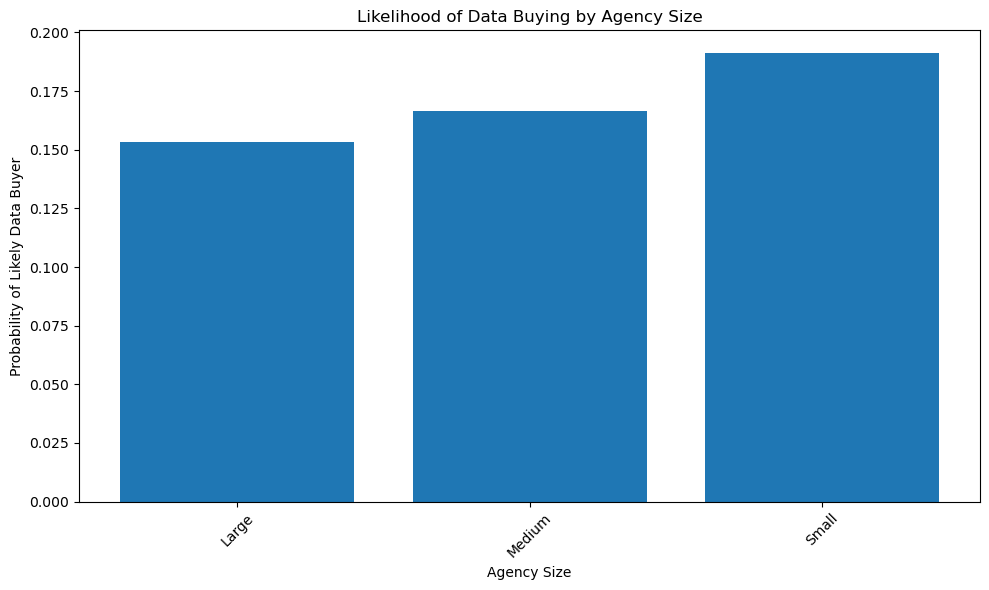

In [129]:
# Group by AgencySize and calculate mean of IsLikelyDataBuyer
likelihood_by_agency = df.groupby('AgencySize')['IsLikelyDataBuyer'].mean().reset_index()
likelihood_by_agency.columns = ['AgencySize', 'ProbabilityLikelyDataBuyer']

print(likelihood_by_agency)



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(likelihood_by_agency['AgencySize'], likelihood_by_agency['ProbabilityLikelyDataBuyer'])
plt.xlabel('Agency Size')
plt.ylabel('Probability of Likely Data Buyer')
plt.title('Likelihood of Data Buying by Agency Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [130]:
from scipy.stats import ttest_ind

# Filter the two groups
large = df[df['AgencySize'] == 'Large']['IsLikelyDataBuyer']
small = df[df['AgencySize'] == 'Small']['IsLikelyDataBuyer']

# Welch’s t-test
t_stat, p_value = ttest_ind(large, small, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -2.9120
P-value: 0.0036


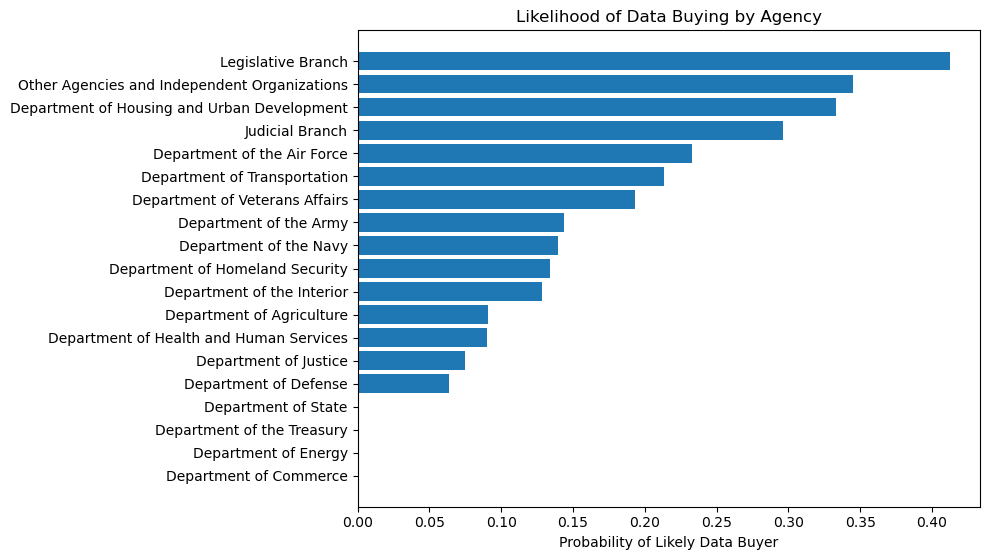

In [131]:
import matplotlib.pyplot as plt

# Group by Agency and calculate probability
agency_likelihood = df.groupby('Agency')['IsLikelyDataBuyer'].mean().reset_index()
agency_likelihood = agency_likelihood.sort_values(by='IsLikelyDataBuyer', ascending=True)

# Rename for clarity
agency_likelihood.columns = ['Agency', 'ProbabilityLikelyDataBuyer']

# Plot
plt.figure(figsize=(10, len(agency_likelihood) * 0.3))  # Dynamic height
plt.barh(agency_likelihood['Agency'], agency_likelihood['ProbabilityLikelyDataBuyer'])
plt.xlabel('Probability of Likely Data Buyer')
plt.title('Likelihood of Data Buying by Agency')
plt.tight_layout()
plt.show()


In [132]:
# List of job titles to exclude (case-insensitive)
exclude_titles = ['Pharmacy Technician', 'Dental Assistant', 'Nurse', 'Motor Vehicle Operator']

# Set IsLikelyDataBuyer to 0 for excluded job titles
df.loc[df['JobTitle'].str.lower().isin([title.lower() for title in exclude_titles]), 'IsLikelyDataBuyer'] = 0


In [133]:
import numpy as np

# Define function to classify each job
def classify_industry(row):
    text = f"{row['JobTitle']} {row['Department']} {row['SearchKeywords']}".lower()
    
    if any(x in text for x in ['finance', 'financial', 'account', 'budget']):
        return 'Finance'
    elif any(x in text for x in ['marketing', 'communications', 'advertising']):
        return 'Marketing'
    elif any(x in text for x in ['medical', 'pharmacy', 'nurse', 'health', 'clinical']):
        return 'Medical'
    elif any(x in text for x in ['cyber', 'security', 'information technology', 'it', 'data scientist', 'software', 'tech']):
        return 'Security/Tech'
    elif any(x in text for x in ['policy', 'regulation', 'legislative', 'analyst', 'compliance']):
        return 'Policy'
    else:
        return 'Other'

# Apply classification
df['Industry'] = df.apply(classify_industry, axis=1)


In [134]:
# Filter to likely data buyers
likely_buyers = df[df['IsLikelyDataBuyer'] == 1]

# Count by industry
industry_counts = likely_buyers['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'LikelyDataBuyerCount']

print(industry_counts)


        Industry  LikelyDataBuyerCount
0        Medical                   489
1  Security/Tech                   256
2          Other                    90
3        Finance                    50
4      Marketing                    18
5         Policy                    10


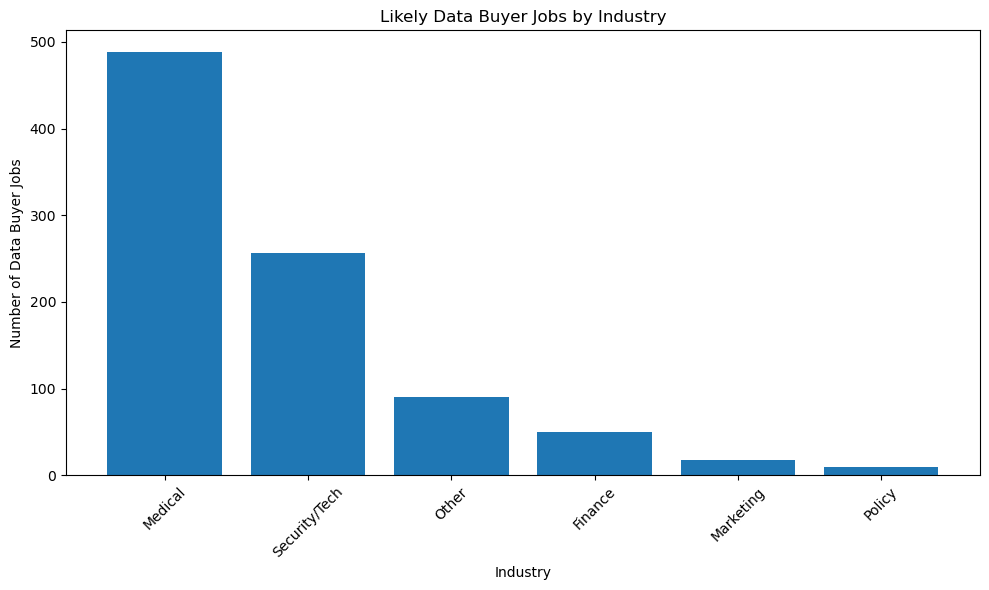

In [135]:
import matplotlib.pyplot as plt

# Count likely data buyers by industry
likely_buyers = df[df['IsLikelyDataBuyer'] == 1]
industry_counts = likely_buyers['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'LikelyDataBuyerCount']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(industry_counts['Industry'], industry_counts['LikelyDataBuyerCount'])
plt.xlabel('Industry')
plt.ylabel('Number of Data Buyer Jobs')
plt.title('Likely Data Buyer Jobs by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [136]:
# Filter for likely data buyers
likely_buyers = df[df['IsLikelyDataBuyer'] == 1]

# Count job titles
title_counts = likely_buyers['JobTitle'].value_counts().reset_index()
title_counts.columns = ['JobTitle', 'Count']

# Show top 10 titles
print(title_counts.head(10))


                                                        JobTitle  Count
0                                            Contract Specialist     12
1                                            CONTRACT SPECIALIST     10
2                             Advanced Medical Support Assistant     10
3              Health Technician (Hearing Instrument Specialist)      9
4                                       Health System Specialist      6
5                            Project Manager (Interdisciplinary)      6
6                                  Medical Laboratory Technician      6
7                                    Certified Nurse Anesthetist      6
8                                            Physician Assistant      5
9  Biomedical Equipment Support Specialist (Information Systems)      5


In [137]:
# Total job count per industry
total_by_industry = df['Industry'].value_counts().reset_index()
total_by_industry.columns = ['Industry', 'TotalJobs']

# Likely data buyer count per industry
likely_by_industry = df[df['IsLikelyDataBuyer'] == 1]['Industry'].value_counts().reset_index()
likely_by_industry.columns = ['Industry', 'LikelyDataBuyerJobs']

# Merge both
industry_prob = pd.merge(total_by_industry, likely_by_industry, on='Industry', how='left')

# Fill NaN with 0 (industries with no likely data buyers)
industry_prob['LikelyDataBuyerJobs'] = industry_prob['LikelyDataBuyerJobs'].fillna(0)

# Calculate probability
industry_prob['Probability'] = industry_prob['LikelyDataBuyerJobs'] / industry_prob['TotalJobs']

# Sort
industry_prob = industry_prob.sort_values(by='Probability', ascending=False)

print(industry_prob)


        Industry  TotalJobs  LikelyDataBuyerJobs  Probability
3        Finance        139                   50     0.359712
5         Policy         31                   10     0.322581
4      Marketing         71                   18     0.253521
0        Medical       2892                  489     0.169087
2          Other        694                   90     0.129683
1  Security/Tech       2002                  256     0.127872


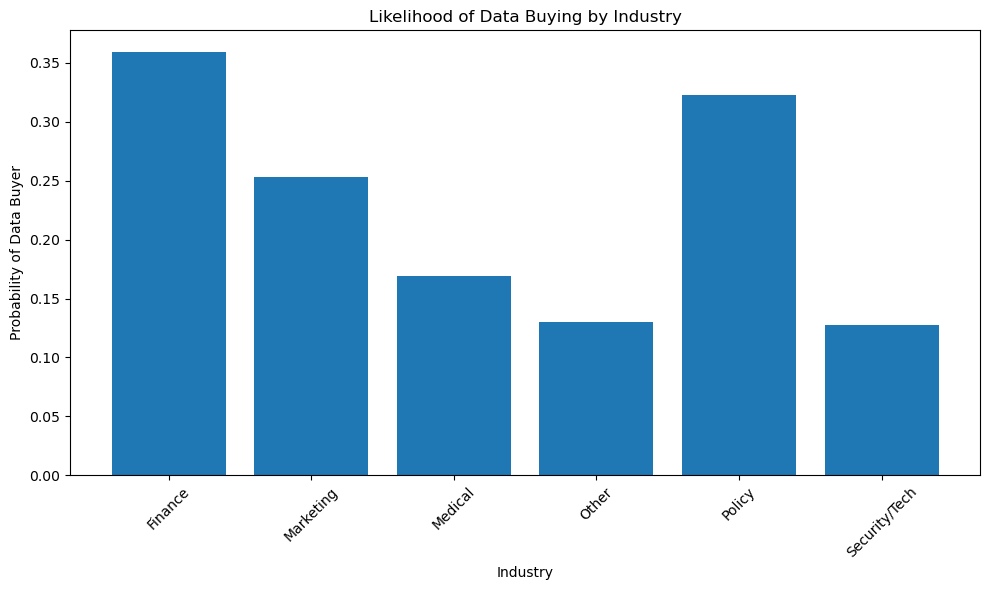

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate standard error and CI
group_stats = df.groupby('Industry')['IsLikelyDataBuyer'].agg(['mean', 'count', 'std']).reset_index()
group_stats['se'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci95'] = 1.96 * group_stats['se']

# Plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(group_stats['Industry'], group_stats['mean'], capsize=5)
plt.ylabel('Probability of Data Buyer')
plt.xlabel('Industry')
plt.title('Likelihood of Data Buying by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [139]:
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd

# Assume df is your DataFrame and it has 'Industry' and 'IsLikelyDataBuyer' columns

# Get list of industries
industries = df['Industry'].dropna().unique()

# Run Welch’s t-test for all pairs
results = []

for a, b in combinations(industries, 2):
    group_a = df[df['Industry'] == a]['IsLikelyDataBuyer']
    group_b = df[df['Industry'] == b]['IsLikelyDataBuyer']
    
    if group_a.empty or group_b.empty:
        continue  # skip if one group is empty
    
    t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False)
    
    results.append({
        'Industry A': a,
        'Industry B': b,
        'T-statistic': t_stat,
        'P-value': p_val
    })

# Convert to DataFrame and view
ttest_df = pd.DataFrame(results).sort_values(by='P-value')
print(ttest_df)


       Industry A Industry B  T-statistic       P-value
2   Security/Tech    Finance    -5.582518  1.107483e-07
9           Other    Finance    -5.374507  2.567477e-07
6         Medical    Finance    -4.599618  9.098886e-06
0   Security/Tech    Medical    -4.035058  5.547623e-05
5         Medical      Other     2.709723  6.834581e-03
4   Security/Tech  Marketing    -2.392001  1.933604e-02
11          Other  Marketing    -2.313051  2.333375e-02
3   Security/Tech     Policy    -2.272702  3.025815e-02
10          Other     Policy    -2.235311  3.265283e-02
7         Medical     Policy    -1.792498  8.301021e-02
13        Finance  Marketing     1.605913  1.103491e-01
8         Medical  Marketing    -1.609466  1.118582e-01
14         Policy  Marketing     0.691023  4.925522e-01
12        Finance     Policy     0.392426  6.966039e-01
1   Security/Tech      Other    -0.122480  9.025395e-01


In [140]:
import pandas as pd
from scipy.stats import ttest_ind

# Add a binary flag for senior roles
senior_keywords = ['senior', 'lead', 'chief', 'principal', 'director', 'head']

df['IsSeniorRole'] = df['JobTitle'].str.lower().str.contains('|'.join(senior_keywords), na=False)

# Calculate likelihood
senior_mean = df[df['IsSeniorRole'] == True]['IsLikelyDataBuyer'].mean()
non_senior_mean = df[df['IsSeniorRole'] == False]['IsLikelyDataBuyer'].mean()

print(f"Senior Role Likelihood: {senior_mean:.4f}")
print(f"Non-Senior Role Likelihood: {non_senior_mean:.4f}")

# T-test
senior_group = df[df['IsSeniorRole'] == True]['IsLikelyDataBuyer']
non_senior_group = df[df['IsSeniorRole'] == False]['IsLikelyDataBuyer']

t_stat, p_val = ttest_ind(senior_group, non_senior_group, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


Senior Role Likelihood: 0.1725
Non-Senior Role Likelihood: 0.1552
T-statistic: 0.9697
P-value: 0.3326


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Create a combined text field
df['text'] = df['JobTitle'].fillna('') + ' ' + df['JobDescription'].fillna('') + ' ' + df['SearchKeywords'].fillna('')

# Split into two groups
buyers = df[df['IsLikelyDataBuyer'] == 1]['text']
non_buyers = df[df['IsLikelyDataBuyer'] == 0]['text']

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_buyers = vectorizer.fit_transform(buyers)
X_non_buyers = vectorizer.transform(non_buyers)

# Compute average TF-IDF per term
buyer_mean = np.asarray(X_buyers.mean(axis=0)).ravel()
non_buyer_mean = np.asarray(X_non_buyers.mean(axis=0)).ravel()
terms = vectorizer.get_feature_names_out()

# Compute score difference
diff = buyer_mean - non_buyer_mean

# Get top positive (data buyer-associated) terms
top_indices = diff.argsort()[::-1][:30]
top_keywords = pd.DataFrame({
    'Keyword': terms[top_indices],
    'ScoreDifference': diff[top_indices]
})

print(top_keywords)


             Keyword  ScoreDifference
0         specialist         0.010684
1            support         0.010224
2             health         0.009672
3              guard         0.009472
4         management         0.009300
5           national         0.009188
6            manager         0.007582
7           contract         0.007081
8            analyst         0.006105
9              chief         0.006082
10                32         0.005883
11             title         0.005563
12    administrative         0.005332
13        operations         0.005217
14           finance         0.005208
15        purchasing         0.005135
16       performance         0.005106
17       supervisory         0.004984
18             basis         0.004485
19           surface         0.004362
20         equipment         0.004257
21          research         0.004108
22         counselor         0.003967
23  responsibilities         0.003932
24              read         0.003905
25         m

In [142]:
import pandas as pd
import statsmodels.formula.api as smf

# Example preprocessing: create relevant features
df['IsSeniorRole'] = df['JobTitle'].str.lower().str.contains('senior|lead|chief|director|principal|head', na=False)
df['Industry'] = df['Industry'].fillna('Other')  # Ensure no missing
df['AgencySize'] = df['AgencySize'].fillna('Unknown')

# Convert booleans to integers
df['IsSeniorRole'] = df['IsSeniorRole'].astype(int)

# Build ANCOVA model
model = smf.ols(
    formula='IsLikelyDataBuyer ~ DataBuyerScore + IsSeniorRole + C(Industry) + C(AgencySize)',
    data=df
).fit()

# Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      IsLikelyDataBuyer   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     20.40
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           3.33e-34
Time:                        16:00:33   Log-Likelihood:                -2280.9
No. Observations:                5829   AIC:                             4582.
Df Residuals:                    5819   BIC:                             4648.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [143]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a senior role flag
df['IsSeniorRole'] = df['JobTitle'].str.lower().str.contains('senior|lead|chief|director|principal|head', na=False).astype(int)

# Handle missing categories
df['Industry'] = df['Industry'].fillna('Other')
df['AgencySize'] = df['AgencySize'].fillna('Unknown')

# Logistic regression model
logit_model = smf.logit(
    formula='IsLikelyDataBuyer ~ DataBuyerScore + IsSeniorRole + C(Industry) + C(AgencySize)',
    data=df
).fit()

# View results
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.420326
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      IsLikelyDataBuyer   No. Observations:                 5829
Model:                          Logit   Df Residuals:                     5819
Method:                           MLE   Df Model:                            9
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                 0.03160
Time:                        16:00:33   Log-Likelihood:                -2450.1
converged:                       True   LL-Null:                       -2530.0
Covariance Type:            nonrobust   LLR p-value:                 7.868e-30
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.5910      0.209     -7.623      0.000

In [144]:
df['mentions_procurement'] = df['CombinedText'].str.contains('procurement', case=False, na=False).astype(int)
df['mentions_inventory'] = df['CombinedText'].str.contains('inventory', case=False, na=False).astype(int)
df['mentions_automation'] = df['CombinedText'].str.contains('automation', case=False, na=False).astype(int)
# etc.


In [145]:
logit_model = smf.logit(
    formula='IsLikelyDataBuyer ~ DataBuyerScore + IsSeniorRole + C(Industry) + C(AgencySize) + mentions_procurement + mentions_inventory + mentions_automation',
    data=df
).fit()


Optimization terminated successfully.
         Current function value: 0.390429
         Iterations 7


In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Step 1: Vectorize the text
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['CombinedText'].fillna(''))

# Step 2: Fit logistic regression
y = df['IsLikelyDataBuyer']
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Step 3: Get word importance (coefficients)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Keyword': feature_names,
    'Coefficient': coefficients
})

# Sort by impact
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Top predictors of being a data buyer
top_positive = importance_df.head(15)

# Top predictors of NOT being a data buyer
top_negative = importance_df.tail(15)

print("Top words indicating likely data buyers:")
print(top_positive)

print("\nTop words associated with non-data buyers:")
print(top_negative)


Top words indicating likely data buyers:
         Keyword  Coefficient
704  procurement     3.108501
746    realistic     1.928749
841         sent     1.652919
490         join     1.322619
942    travelers     1.289164
80       applies     1.274211
355     external     1.241010
593     observes     1.205271
445  independent     1.201919
726    providers     1.189591
903   supporting     1.153256
44      actively     1.116474
364     feedback     1.052502
14          30am     1.035924
47        actual     1.029220

Top words associated with non-data buyers:
        Keyword  Coefficient
374       focus    -0.964106
856       signs    -0.995268
232       corps    -1.012622
382      foster    -1.083142
163   classroom    -1.100737
606    operates    -1.128920
517      living    -1.171318
508   liability    -1.187783
3          00pm    -1.261052
153       check    -1.313355
631     parents    -1.319888
9           200    -1.319960
242   courteous    -1.620618
422  identified    -1.664663


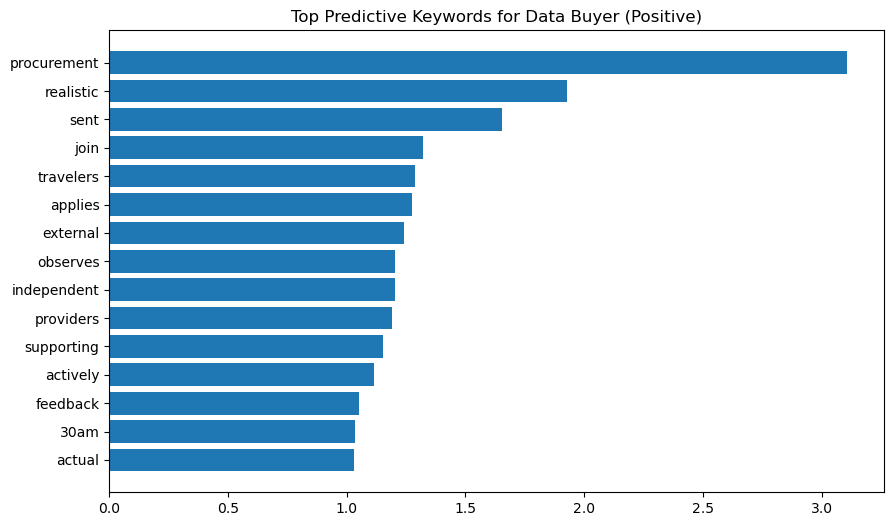

In [147]:
import matplotlib.pyplot as plt

top_n = 15
top_pos = importance_df.sort_values(by='Coefficient', ascending=False).head(top_n)
top_neg = importance_df.sort_values(by='Coefficient').head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_pos['Keyword'], top_pos['Coefficient'])
plt.title('Top Predictive Keywords for Data Buyer (Positive)')
plt.gca().invert_yaxis()
plt.show()


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Subset to likely data buyer jobs
buyer_texts = df[df['IsLikelyDataBuyer'] == 1]['JobDescription'].fillna('')

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(buyer_texts)

# Topic modeling
nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_
terms = vectorizer.get_feature_names_out()

# Show top words per topic
for topic_idx, topic in enumerate(H):
    top_words = [terms[i] for i in topic.argsort()[-10:][::-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Topic #1: edrp, program, loan, eligibility, vha, application, education, reimbursement, student, months
Topic #2: flyer, applicants, interested, notice, vacancies, accepted, notify, applications, actual, anticipated
Topic #3: guard, national, position, title, 32, description, number, excepted, air, service
Topic #4: care, health, medical, va, position, support, service, community, team, located
Topic #5: humane, foster, corrections, reentry, communities, professionals, secure, preparing, successful, individuals


In [149]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['CombinedText'].fillna(''))

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Check data buyer rate per cluster
print(df.groupby('Cluster')['IsLikelyDataBuyer'].mean())


C:\Users\roryq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    0.139932
1    0.162896
2    0.009804
3    0.050347
4    0.183546
Name: IsLikelyDataBuyer, dtype: float64


In [150]:
keywords = ['data', 'procurement', 'analytics', 'platform', 'dashboard', 'information', 'purchase']
df['KeywordDensity'] = df['CombinedText'].str.lower().apply(lambda text: sum(k in text for k in keywords))

# Compare density
print(df.groupby('IsLikelyDataBuyer')['KeywordDensity'].mean())


IsLikelyDataBuyer
0    0.737388
1    1.177437
Name: KeywordDensity, dtype: float64


=== Contract Specialist Jobs by Agency Size ===
  AgencySize  NumJobs  ProbabilityLikelyDataBuyer
0      Large       11                    1.000000
1      Small       13                    0.846154

=== Welch’s t-test: Large vs Small Agencies ===
T-statistic: 1.4771
P-value: 0.1654


C:\Users\roryq\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


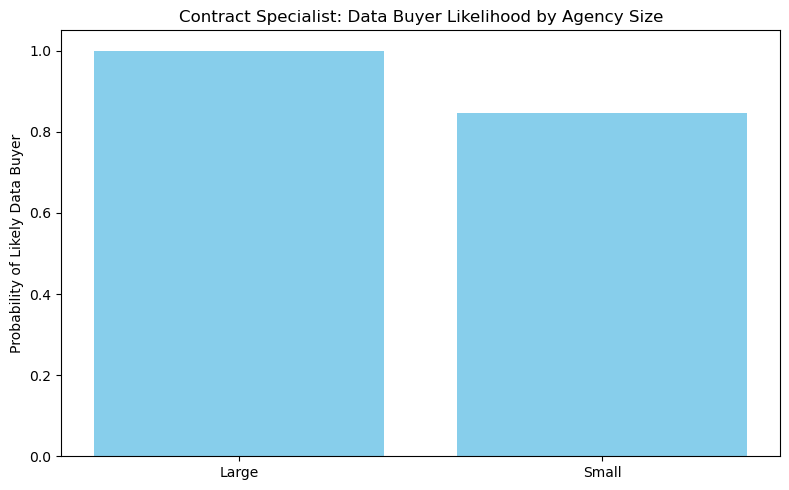

In [151]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# 1. Normalize Job Titles
df['JobTitle_clean'] = df['JobTitle'].str.strip().str.lower()

# 2. Filter for 'Contract Specialist'
contract_specialists = df[df['JobTitle_clean'] == 'contract specialist']

# 3. Group by AgencySize: count & likelihood of data buyer
summary = (
    contract_specialists.groupby('AgencySize')['IsLikelyDataBuyer']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'NumJobs', 'mean': 'ProbabilityLikelyDataBuyer'})
)

print("=== Contract Specialist Jobs by Agency Size ===")
print(summary)

# 4. Welch’s t-test: Large vs Small agencies
large = contract_specialists[contract_specialists['AgencySize'] == 'Large']['IsLikelyDataBuyer']
small = contract_specialists[contract_specialists['AgencySize'] == 'Small']['IsLikelyDataBuyer']

if not large.empty and not small.empty:
    t_stat, p_val = ttest_ind(large, small, equal_var=False)
    print(f"\n=== Welch’s t-test: Large vs Small Agencies ===")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
else:
    print("\nNot enough data in one or both groups to perform t-test.")

# 5. Plot (optional)
plt.figure(figsize=(8, 5))
plt.bar(summary['AgencySize'], summary['ProbabilityLikelyDataBuyer'], color='skyblue')
plt.ylabel('Probability of Likely Data Buyer')
plt.title('Contract Specialist: Data Buyer Likelihood by Agency Size')
plt.tight_layout()
plt.show()


=== % of Data Buyer Jobs NOT Labeled as Data Roles by Agency Size ===
  AgencySize  NonDataJobBuyerRate
0      Large             0.948718
1     Medium             1.000000
2      Small             0.889423


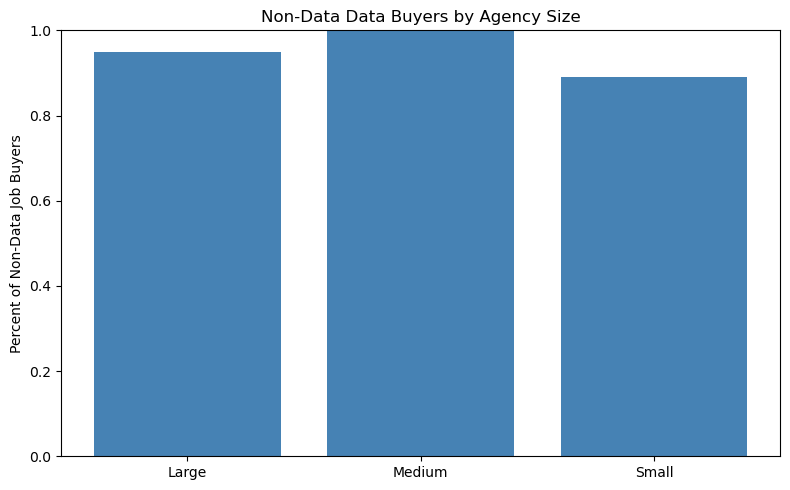

In [152]:
# 1. Define what counts as a data-related job
data_keywords = ['data', 'analyst', 'scientist', 'statistics', 'intelligence', 'information']

# 2. Create flag for explicitly data-related job titles
df['IsExplicitDataJob'] = df['JobTitle'].str.lower().str.contains('|'.join(data_keywords), na=False).astype(int)

# 3. Filter for likely data buyer jobs
buyers = df[df['IsLikelyDataBuyer'] == 1]

# 4. Group by agency size, calculate proportion that are NOT data jobs
summary = (
    buyers.groupby('AgencySize')['IsExplicitDataJob']
    .apply(lambda x: 1 - x.mean())  # percent that are NOT data jobs
    .reset_index()
    .rename(columns={'IsExplicitDataJob': 'NonDataJobBuyerRate'})
)

print("=== % of Data Buyer Jobs NOT Labeled as Data Roles by Agency Size ===")
print(summary)

# 5. Optional: Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(summary['AgencySize'], summary['NonDataJobBuyerRate'], color='steelblue')
plt.ylabel('Percent of Non-Data Job Buyers')
plt.title('Non-Data Data Buyers by Agency Size')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [153]:
data_keywords = ['data', 'analyst', 'scientist', 'analytics', 'it', 'information', 'statistician', 'intelligence']
df['IsDataJob'] = df['JobTitle'].str.lower().str.contains('|'.join(data_keywords), na=False).astype(int)

non_data_jobs = df[df['IsDataJob'] == 0]


from scipy.stats import ttest_ind

# Subsets
small = non_data_jobs[non_data_jobs['AgencySize'] == 'Small']['IsLikelyDataBuyer']
large = non_data_jobs[non_data_jobs['AgencySize'] == 'Large']['IsLikelyDataBuyer']

# Welch's t-test
t_stat, p_val = ttest_ind(small, large, equal_var=False)

# Print results
print("=== Welch’s T-Test: Small vs Large Agencies (Non-Data Jobs) ===")
print(f"Small Agency Mean: {small.mean():.4f}")
print(f"Large Agency Mean: {large.mean():.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


=== Welch’s T-Test: Small vs Large Agencies (Non-Data Jobs) ===
Small Agency Mean: 0.1669
Large Agency Mean: 0.1515
T-statistic: 1.0440
P-value: 0.2967


In [154]:
import pandas as pd

# Step 1: Define use case keywords
use_case_keywords = {
    'Fraud': ['fraud', 'eligibility', 'verification', 'audit', 'compliance'],
    'Sentiment': ['sentiment', 'public opinion', 'media monitoring', 'engagement', 'communication'],
    'PatientMatching': ['patient match', 'interoperability', 'record linkage', 'ehr', 'health record'],
    'AdTargeting': ['audience segmentation', 'targeting', 'ad performance', 'campaign data']
}

# Step 2: Create use case flags
for use_case, keywords in use_case_keywords.items():
    pattern = '|'.join(keywords)
    df[f'UseCase_{use_case}'] = df['CombinedText'].str.lower().str.contains(pattern, na=False).astype(int)

# Step 3: Filter for likely data buyers
buyers = df[df['IsLikelyDataBuyer'] == 1]

# Step 4: Group by agency and count use case matches
use_case_cols = [col for col in df.columns if col.startswith('UseCase_')]
agency_use_cases = buyers.groupby('Agency')[use_case_cols].sum().sort_values(by=use_case_cols, ascending=False)

# Step 5: Print top agencies per use case
for use_case in use_case_cols:
    print(f"\nTop agencies for {use_case.replace('UseCase_', '')}:")
    top_agencies = agency_use_cases[use_case].sort_values(ascending=False).head(10)
    print(top_agencies)



Top agencies for Fraud:
Agency
Department of Veterans Affairs                  263
Department of the Army                           37
Department of the Navy                           35
Department of the Air Force                      32
Department of Homeland Security                  24
Department of Transportation                     21
Legislative Branch                               11
Judicial Branch                                   7
Department of Defense                             7
Other Agencies and Independent Organizations      6
Name: UseCase_Fraud, dtype: int32

Top agencies for Sentiment:
Agency
Department of Veterans Affairs                  120
Department of the Army                           13
Department of the Air Force                      12
Department of the Navy                            9
Legislative Branch                                7
Department of Transportation                      5
Department of Homeland Security                   4
Judicial Branc

C:\Users\roryq\AppData\Local\Temp\ipykernel_19448\3919544167.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(top_agencies.index, ha='right', fontsize=10)


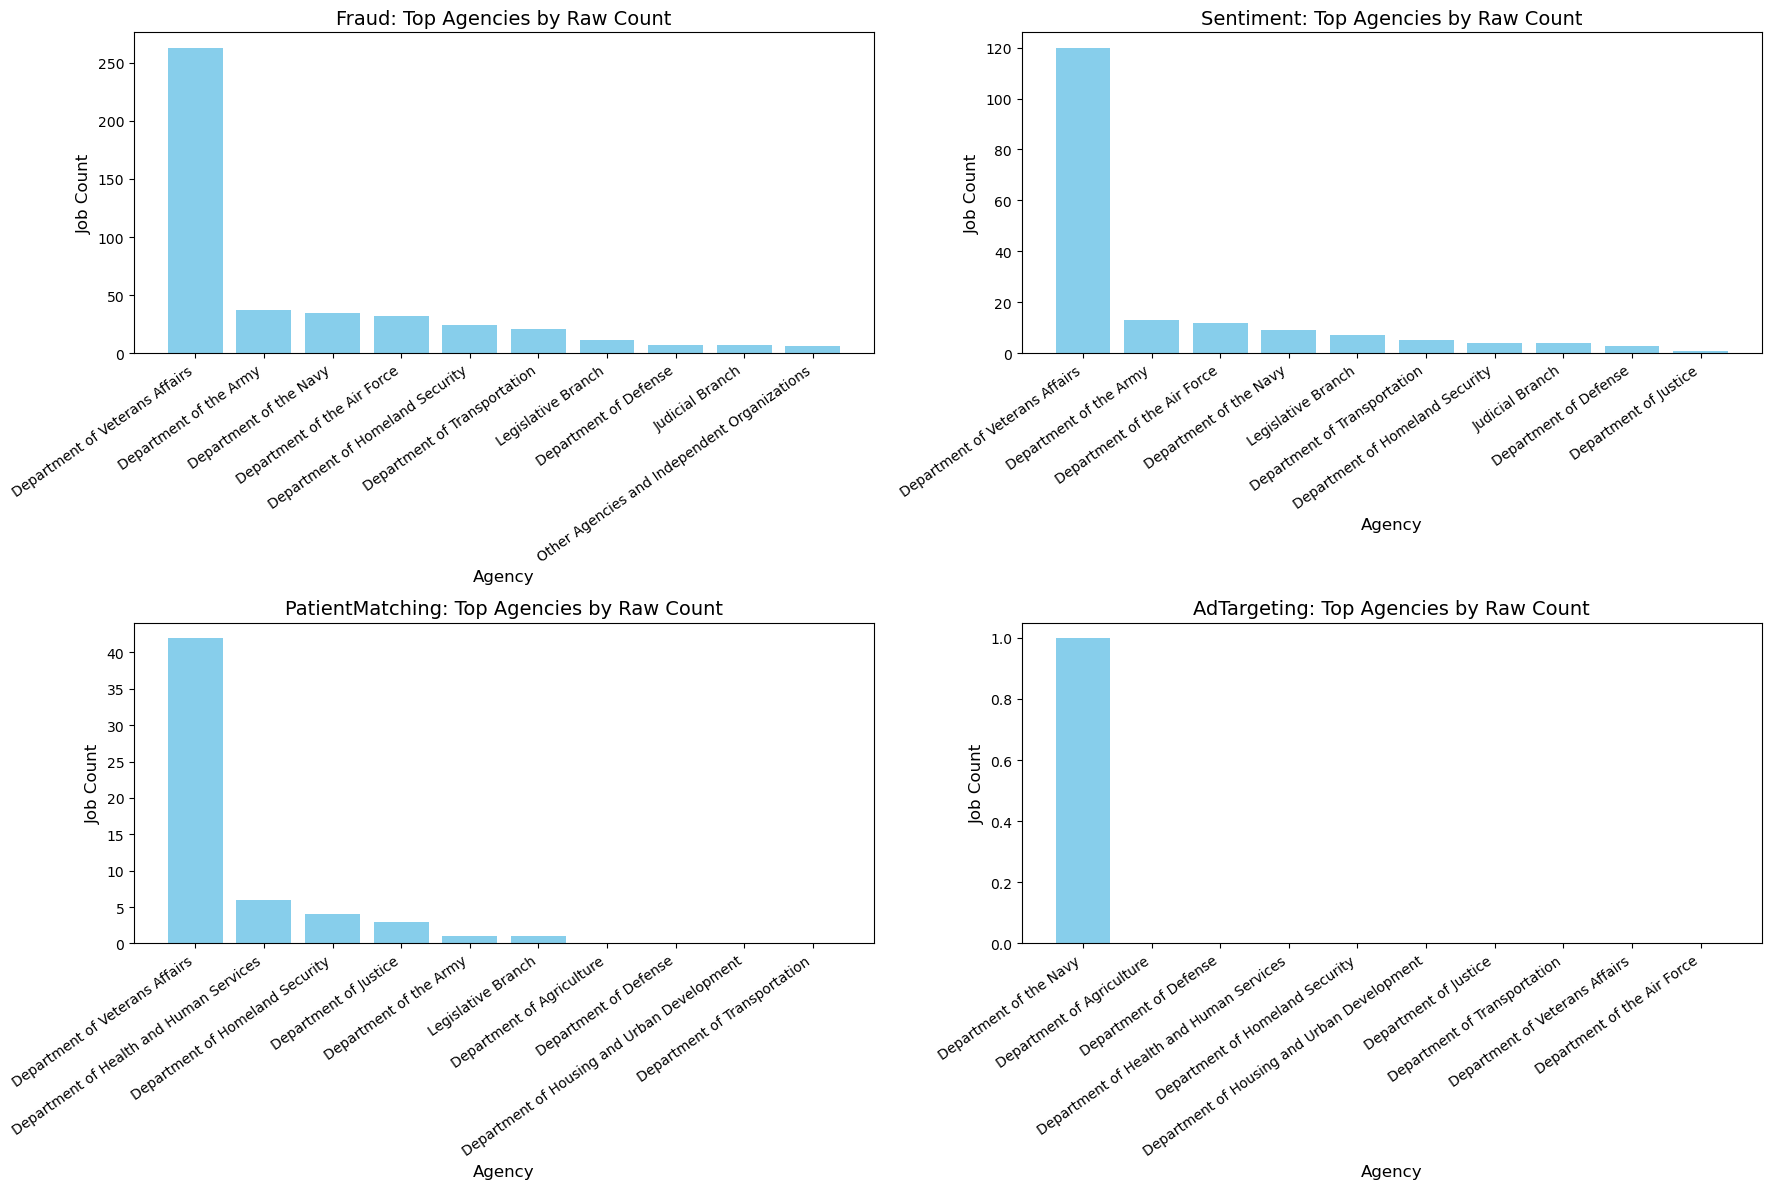

In [164]:
# Recalculate agency_use_cases (raw counts instead of percentage)
agency_use_cases = buyers.groupby('Agency')[use_case_cols].sum()

# Create grid layout for top 10 agency counts by use case
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Plot each use case as a bar chart in the grid
for i, use_case in enumerate(use_case_cols):
    top_agencies = agency_use_cases[use_case].sort_values(ascending=False).head(10)
    
    axes[i].bar(top_agencies.index, top_agencies.values, color='skyblue')
    axes[i].set_title(f'{use_case.replace("UseCase_", "")}: Top Agencies by Raw Count', fontsize=14)
    axes[i].set_xlabel('Agency', fontsize=12)
    axes[i].set_ylabel('Job Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=35)
    axes[i].set_xticklabels(top_agencies.index, ha='right', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\roryq\AppData\Local\Temp\ipykernel_19448\2424594628.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(top_agencies.index, ha='right', fontsize=10)


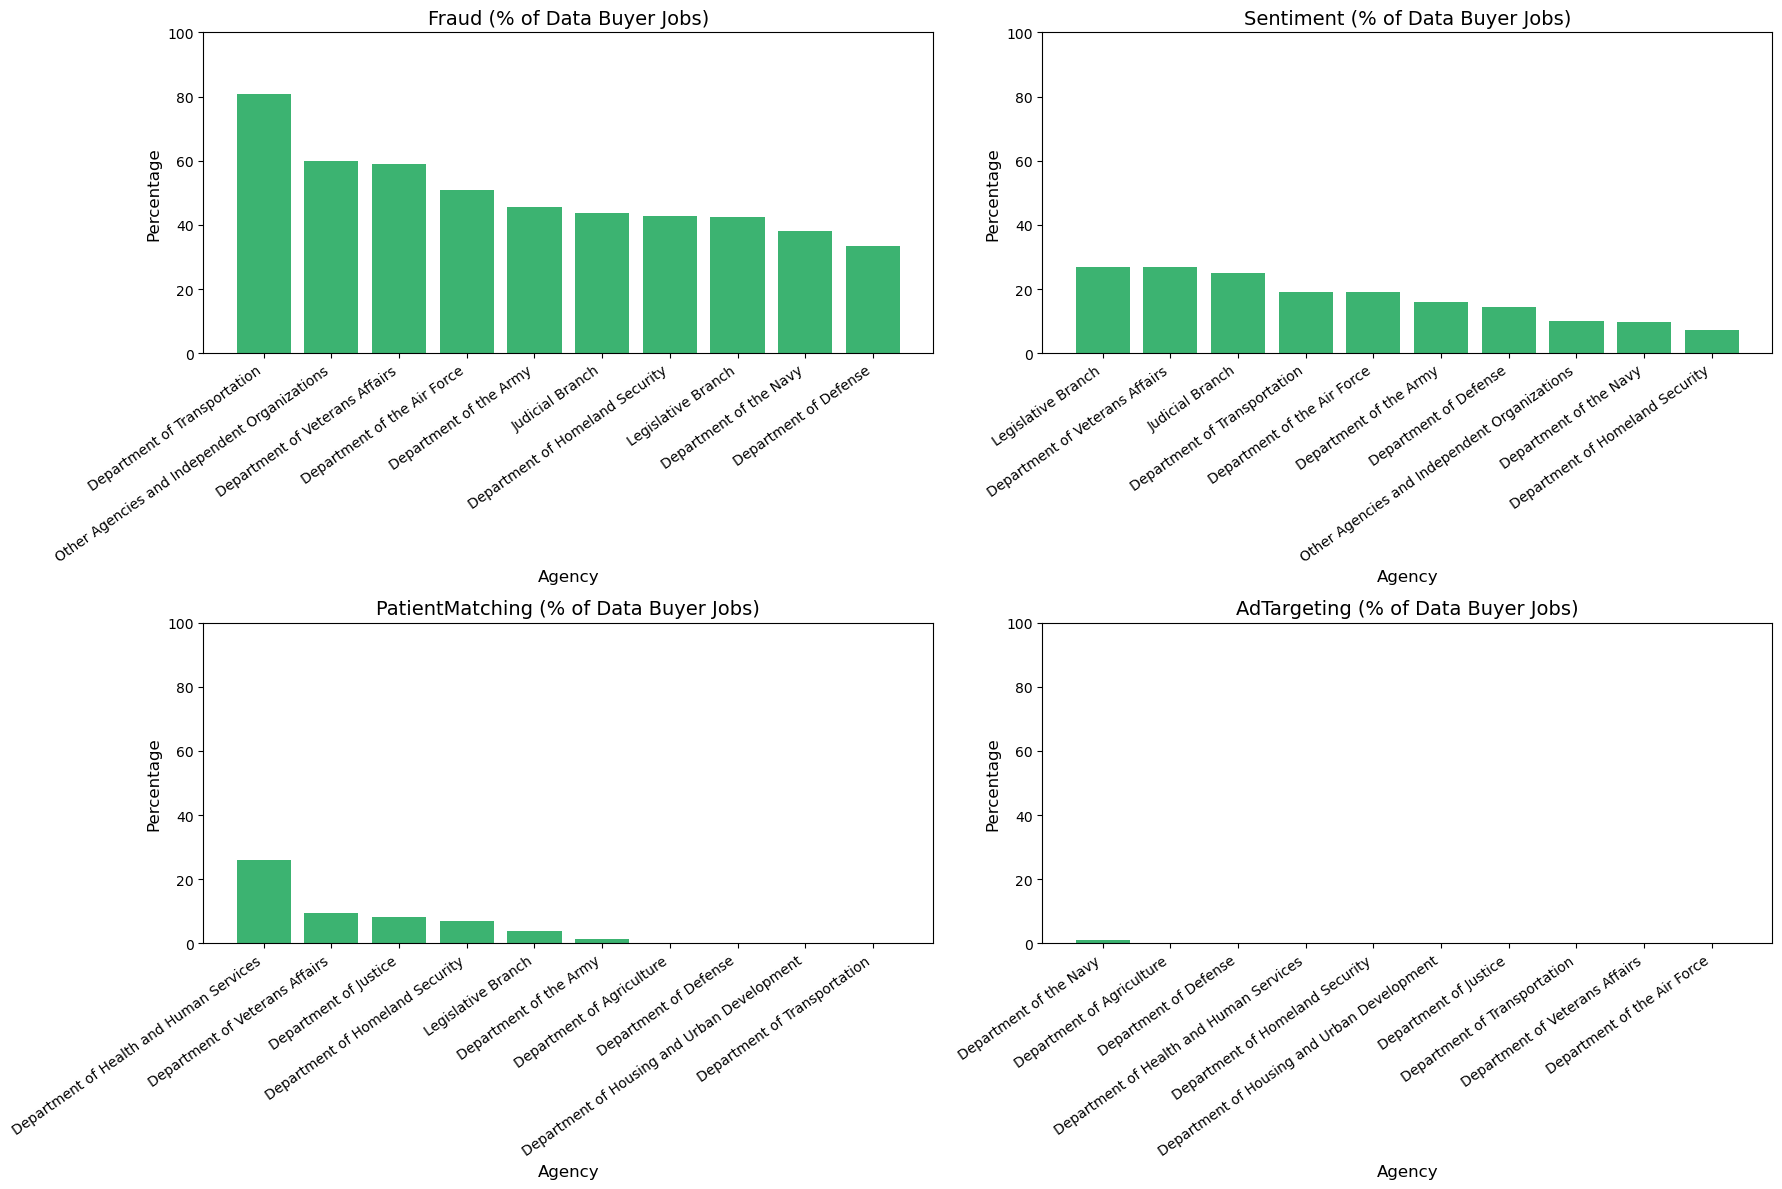

In [163]:
# Replot the grid with adjusted label formatting to avoid overlap
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, use_case in enumerate(use_case_cols):
    top_agencies = use_case_percent[use_case].sort_values(ascending=False).head(10)
    
    axes[i].bar(top_agencies.index, top_agencies.values, color='mediumseagreen')
    axes[i].set_title(f'{use_case.replace("UseCase_", "")} (% of Data Buyer Jobs)', fontsize=14)
    axes[i].set_xlabel('Agency', fontsize=12)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=35)
    axes[i].set_xticklabels(top_agencies.index, ha='right', fontsize=10)

plt.tight_layout()
plt.show()


In [157]:
# Agency size effect: small vs large agency, looking at generalist titles
# (e.g., Program Coordinator, Contract Specialist, etc.)
generalist_titles = ['Contract Specialist', 'Program Analyst', 'Management Analyst',
                     'Grants Officer', 'Public Affairs Officer', 'Health IT Coordinator',
                     'Communications Strategist', 'Budget Officer']
df['IsGeneralistRole'] = df['JobTitle'].isin(generalist_titles)
agency_size_pivot = df.pivot_table(index='AgencySize', columns='IsGeneralistRole',
                                   values='IsDataBuyer', aggfunc='mean')
agency_size_pivot

IsGeneralistRole,False,True
AgencySize,,
Large,0.001787,0.0
Medium,0.000000,NaN
Small,0.004608,0.0


In [160]:
# Rebuild CombinedText to include JobTitle, JobDescription, and KeyDuties (but not SearchKeywords)
df['CombinedText'] = (
    df['JobTitle'].fillna('') + ' ' +
    df['JobDescription'].fillna('') + ' ' +
    df['KeyDuties'].fillna('')
)


# Remove 'DataBuyerScore' and rebuild the metadata features
meta_with_industry = df[['AgencySize', 'Industry', 'IsSeniorRole']]

# Recreate the column transformer without DataBuyerScore
meta_transformer_with_industry = ColumnTransformer(transformers=[
    ('onehot_agency', OneHotEncoder(handle_unknown='ignore'), ['AgencySize']),
    ('onehot_industry', OneHotEncoder(handle_unknown='ignore'), ['Industry']),
    ('scale_senior', StandardScaler(), ['IsSeniorRole'])
])

# Transform metadata
X_meta_with_industry = meta_transformer_with_industry.fit_transform(meta_with_industry)

# Vectorize text with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_features=5000)
X_text = vectorizer.fit_transform(df['CombinedText'].fillna(''))

# Combine text and metadata
X_combined_with_industry = hstack([X_text, X_meta_with_industry])
y = df['IsLikelyDataBuyer']

# Apply SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_combined_with_industry, y)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Evaluate on full set
y_pred = model.predict(X_combined_with_industry)
y_pred_proba = model.predict_proba(X_combined_with_industry)[:, 1]
classification_report_result = classification_report(y, y_pred, output_dict=True)

# Get top token weights
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0][:len(feature_names)]

top_pos_idx = np.argsort(coefficients)[-15:][::-1]
top_positive_tokens = pd.DataFrame({
    'Token': feature_names[top_pos_idx],
    'Weight': coefficients[top_pos_idx]
})

top_neg_idx = np.argsort(coefficients)[:15]
top_negative_tokens = pd.DataFrame({
    'Token': feature_names[top_neg_idx],
    'Weight': coefficients[top_neg_idx]
})

top_positive_tokens, top_negative_tokens, classification_report_result


(              Token    Weight
 0        management  7.914475
 1       acquisition  7.425663
 2       procurement  7.292309
 3        commercial  4.448323
 4         providers  4.376040
 5         contracts  3.920962
 6   program service  3.628433
 7              data  3.625628
 8          internal  3.536866
 9          provider  3.524472
 10     stakeholders  3.476896
 11         external  3.413922
 12          records  3.087543
 13         licensed  2.890967
 14         aviation  2.760787,
                      Token    Weight
 0                nutrition -2.086327
 1                   school -1.774259
 2               conditions -1.767174
 3              instruments -1.734694
 4               individual -1.718352
 5                principal -1.714748
 6            communication -1.687498
 7                    youth -1.660055
 8                      nas -1.638623
 9   interdisciplinary team -1.602657
 10              complexity -1.590180
 11                  ocular -1.586555
 12      

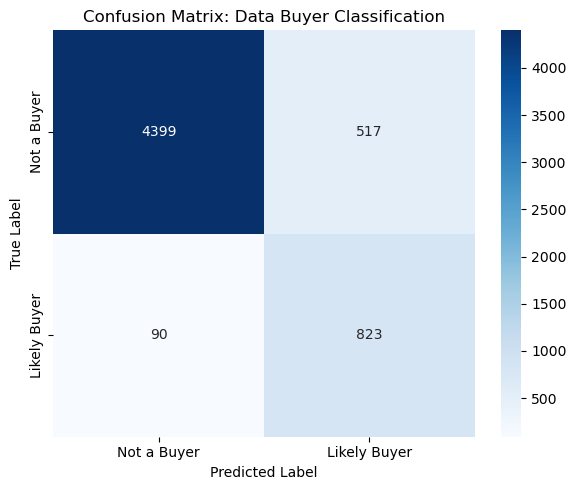

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)
labels = ['Not a Buyer', 'Likely Buyer']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Data Buyer Classification')
plt.tight_layout()
plt.show()


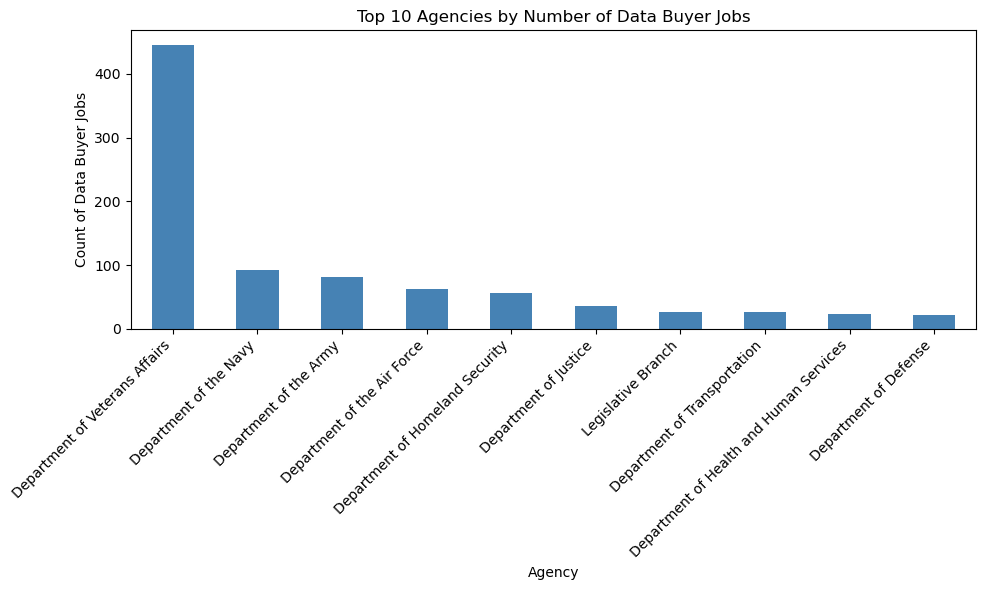

In [166]:
# Count the number of likely data buyer jobs per agency
top_buyer_agencies = df[df['IsLikelyDataBuyer'] == 1]['Agency'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_buyer_agencies.plot(kind='bar', color='steelblue')
plt.title('Top 10 Agencies by Number of Data Buyer Jobs')
plt.xlabel('Agency')
plt.ylabel('Count of Data Buyer Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [168]:
# Display the top 10 agencies with the most data buyer jobs as a clean markdown-style table
top_buyer_agencies_df = top_buyer_agencies.reset_index()
top_buyer_agencies_df.columns = ['Agency', 'Data Buyer Jobs']

# Convert to GitHub Markdown format
markdown_table = "| Agency | Data Buyer Jobs |\n|--------|------------------|\n"
for _, row in top_buyer_agencies_df.iterrows():
    markdown_table += f"| {row['Agency']} | {row['Data Buyer Jobs']} |\n"

markdown_table

'| Agency | Data Buyer Jobs |\n|--------|------------------|\n| Department of Veterans Affairs | 446 |\n| Department of the Navy | 92 |\n| Department of the Army | 81 |\n| Department of the Air Force | 63 |\n| Department of Homeland Security | 56 |\n| Department of Justice | 36 |\n| Legislative Branch | 26 |\n| Department of Transportation | 26 |\n| Department of Health and Human Services | 23 |\n| Department of Defense | 21 |\n'